In [3]:
"""traditional prog : rules+data=answer
   machine learning : answers+data=rules
   """
import matplotlib.pyplot as plt


In [4]:
import tensorflow as tf
import numpy as np
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs= np.array([-1,0,1,2,3,4],dtype=float)
ys= np.array([-3,-1,1,3,5,7],dtype=float)
model.fit(xs,ys, epochs=20)


Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 20.1300
Epoch 2/20
1/1 [==============================] - 0s 6ms/step - loss: 16.1042
Epoch 3/20
1/1 [==============================] - 0s 39ms/step - loss: 12.9315
Epoch 4/20
1/1 [==============================] - 0s 3ms/step - loss: 10.4300
Epoch 5/20
1/1 [==============================] - 0s 9ms/step - loss: 8.4567
Epoch 6/20
1/1 [==============================] - 0s 4ms/step - loss: 6.8990
Epoch 7/20
1/1 [==============================] - 0s 16ms/step - loss: 5.6684
Epoch 8/20
1/1 [==============================] - 0s 12ms/step - loss: 4.6953
Epoch 9/20
1/1 [==============================] - 0s 8ms/step - loss: 3.9249
Epoch 10/20
1/1 [==============================] - 0s 8ms/step - loss: 3.3141
Epoch 11/20
1/1 [==============================] - 0s 16ms/step - loss: 2.8288
Epoch 12/20
1/1 [==============================] - 0s 16ms/step - loss: 2.4425
Epoch 13/20
1/1 [==============================] - 0s 12ms/step -

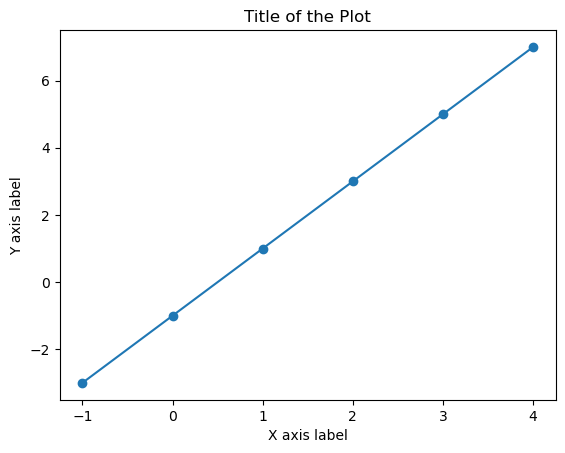

In [20]:
plt.scatter(xs, ys)
plt.plot(xs, ys)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('Plot of the relation')
plt.show()

In [5]:
print(model.predict([10,20,40]))

1/1 [==============================] - 0s 286ms/step
[[14.554758]
 [28.893421]
 [57.570747]]


code_week2


In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()



label : 8

 image pixel array : [[  0   0   0   0   0   0   0   0   0   0   0   2   0  65 108  78   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0  47 123   0  87  38   0   3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5   0 167  51   0  38 157   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 127   0   0   0 142   5   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   0  63 112   0   5   0 102 106   0   6   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   8   0 103  83   0   5   0  38 168   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   5   0 140  39   0   3   0   0 182  17   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0 152   0   0   1   0   0 156 102   0   2   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   6   5   0  32 20

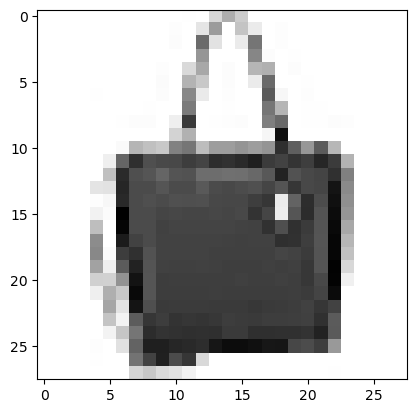

In [7]:
index=44879
np.set_printoptions(linewidth=320)
print(f'label : {train_label[index]}')
print(f'\n image pixel array : {train_img[index]}')
plt.imshow(train_img[index],cmap='Greys')

In [8]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(28,activation=tf.nn.relu),
    tf.keras.layers.Dense(28*2,activation=tf.nn.relu),
    tf.keras.layers.Dense(28*3,activation=tf.nn.relu),
    tf.keras.layers.Dense(28*4,activation=tf.nn.relu),
    tf.keras.layers.Dense(28*5,activation=tf.nn.relu),
    tf.keras.layers.Dense(100,activation=tf.nn.relu),
    tf.keras.layers.Dense(50,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [9]:
train_img=train_img/255
test_img=test_img/225

In [10]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(s, epoch, logs={}):
        if(logs.get('loss')<0.1):
            print('\nLoss is low, cancelling training.')
            s.model.stop_training =True

In [12]:
callbacks= myCallbacks()
model.compile(optimizer = tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_img,train_label,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.3539 - accuracy: 0.8701
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3335 - accuracy: 0.8760
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3217 - accuracy: 0.8815
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3143 - accuracy: 0.8833
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3027 - accuracy: 0.8867


In [13]:
model.evaluate(test_img, test_label)


313/313 [==============================] - 2s 4ms/step - loss: 0.3910 - accuracy: 0.8649


[0.3910372853279114, 0.8648999929428101]

In [15]:
classifications = model.predict(test_img)
np.set_printoptions(suppress=True, precision=1)
print(classifications[0])

313/313 [==============================] - 1s 3ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [16]:
print(test_label[0])

9
